<a href="https://colab.research.google.com/github/rusamentiaga/CoronaDashboard/blob/master/2_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import matplotlib.pyplot as plt
import torch
torch.version.__version__

'1.8.0+cu101'

In [99]:
torch.cuda.is_available()

True

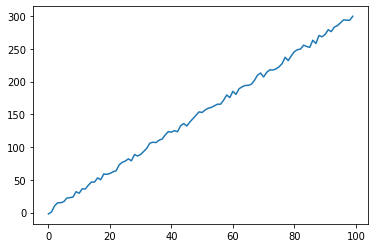

In [100]:
x = torch.tensor(range(100))
y = 3*x + 2
y = y + 10*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

In [101]:
def model(x, w, b):
  return w * x + b

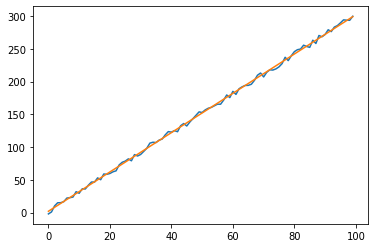

In [102]:
plt.plot(x,y)

y2 = model(x, 3, 2)
plt.plot(x,y2)

In [103]:
def loss_fn(y, yp):
  squared_diffs = (y - yp)**2
  return squared_diffs.mean()

In [104]:
loss_fn(y,y2)

tensor(8.0247)

In [105]:
y3 = model(x, 3.5, 10)
loss_fn(y, y3)


tensor(1286.2002)

*   y = wx + b
*   dy/dw = x
*   dy/db = 1
*   dloss/dw = dloss/dy * dy/dw
*   dloss/db = dloss/dy * dy/db




In [106]:
def dy_dw(x, w, b):
  return x

def dy_db(x, w, b):
  return 1.0

def dloss_fn(y, yp):
  dsq_diffs = 2 * (y - yp) / yp.size(0)
  return dsq_diffs

def grad_fn(x, y, yp, w, b):
  dloss_dy = dloss_fn(y, yp)
  dloss_dw = dloss_dy * dmodel_dw(x, w, b)
  dloss_db = dloss_dy * dmodel_db(x, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [126]:
wp = 1
bp = 1

print(wp, bp)

# Sets learning rate
lr = 1e-4
# Defines number of epochs
n_epochs = 10000

for epoch in range(n_epochs):
    # Computes our model's predicted output
    yp = model(x, wp, bp)
    
    # How wrong is our model? That's the error! 
    loss = loss_fn(y, yp)

    error = (y - yp)
    # It is a regression, so it computes mean squared error (MSE)
    
    # Computes gradients for both "a" and "b" parameters
    wp_grad = -2 * (x * error).mean()
    bp_grad = -2 * error.mean()
    
    # Updates parameters using gradients and the learning rate
    wp = wp - lr * wp_grad
    bp = bp - lr * bp_grad

    if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
      print(f'Epoch {epoch+1}, Loss {loss}')
    
print(wp, bp)
print(loss)

1 1
Epoch 1, Loss 13351.1826171875
Epoch 2, Loss 1579.3753662109375
Epoch 3, Loss 193.21615600585938
Epoch 4, Loss 29.992530822753906
Epoch 5, Loss 10.772510528564453
Epoch 10, Loss 8.207200050354004
Epoch 100, Loss 8.205438613891602
Epoch 500, Loss 8.198046684265137
Epoch 1000, Loss 8.189225196838379
Epoch 5000, Loss 8.132674217224121
Epoch 10000, Loss 8.087716102600098
tensor(3.0102) tensor(1.3725)
tensor(8.0877)


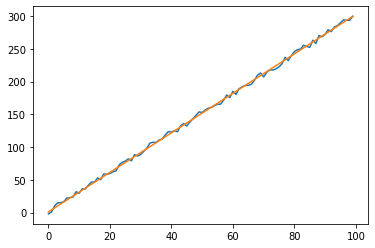

In [113]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp)

In [121]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9
